# Airbnb on Housing Values
## Jonathan Eng

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("cleaned_airbnb_home_data.csv")
df.head()

## Cleaning Data 

In [5]:
df = df.drop(columns = ['BOROUGH', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
        'TOTAL UNITS', 'LAND SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE', 
        'TAX CLASS AT TIME OF SALE'])

In [6]:
#Quality of life changes to column names
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [7]:
percent_airbnb = (df.airbnb_amount / df.home_amount) * 100
df = df.assign(percent_airbnb = percent_airbnb)
df = df.drop(columns = ['airbnb_amount', 'home_amount'])
df = df[df.percent_airbnb < 100]  

df.neighborhood = df.neighborhood.map(lambda x: None if x == 0 else x)
df.building_class_category = df.building_class_category.map(lambda x: None if x == 0 else x)
df.tax_class_at_present = df.tax_class_at_present.map(lambda x: None if x == 0 else x)
df.year_built = df.year_built.map(lambda x: None if x == 0 else x)

df.gross_square_feet = df.gross_square_feet.map(lambda x: None if x == 0 else x)
df.residential_units = df.residential_units.map(lambda x: None if x == 0 else x)

In [8]:
#Combines individual years into decades 

#Homes built before 1800 are removed
df = df[df.year_built >= 1800]  

decade_built = np.where(
    (df.year_built >= 1800) & (df.year_built < 1810), "1800s", np.where( 
    (df.year_built >= 1810) & (df.year_built < 1820), "1810s", np.where( 
    (df.year_built >= 1820) & (df.year_built < 1830), "1820s", np.where( 
    (df.year_built >= 1830) & (df.year_built < 1840), "1830s", np.where( 
    (df.year_built >= 1840) & (df.year_built < 1850), "1840s", np.where( 
    (df.year_built >= 1850) & (df.year_built < 1860), "1850s", np.where( 
    (df.year_built >= 1860) & (df.year_built < 1870), "1860s", np.where( 
    (df.year_built >= 1870) & (df.year_built < 1880), "1870s", np.where( 
    (df.year_built >= 1880) & (df.year_built < 1890), "1880s", np.where( 
    (df.year_built >= 1890) & (df.year_built < 1900), "1890s", np.where( 
    (df.year_built >= 1900) & (df.year_built < 1920), "1910s", np.where( 
    (df.year_built >= 1910) & (df.year_built < 1920), "1910s", np.where( 
    (df.year_built >= 1920) & (df.year_built < 1930), "1920s", np.where( 
    (df.year_built >= 1930) & (df.year_built < 1940), "1930s", np.where( 
    (df.year_built >= 1940) & (df.year_built < 1950), "1940s", np.where( 
    (df.year_built >= 1950) & (df.year_built < 1960), "1950s", np.where( 
    (df.year_built >= 1960) & (df.year_built < 1970), "1960s", np.where( 
    (df.year_built >= 1970) & (df.year_built < 1980), "1970s", np.where( 
    (df.year_built >= 1980) & (df.year_built < 1990), "1980s", np.where( 
    (df.year_built >= 1990) & (df.year_built < 2000), "1990s", np.where( 
    (df.year_built >= 2000) & (df.year_built < 2010), "2000s", np.where( 
    (df.year_built >= 2010) & (df.year_built < 2020), "2010s", None))))))))))))))))))))))

df = df.assign(decade_built = decade_built)
df.decade_built = df.decade_built.astype('category')

df = df.drop(columns = ['year_built'])

In [9]:
#Remove Rows with Missing Data
df = df.dropna()

In [10]:
df.neighborhood = df.neighborhood.astype('category')
df.building_class_category = df.building_class_category.astype('category')
df.tax_class_at_present = df.tax_class_at_present.astype('category')
#df.year_built = df.year_built.astype('category')

df.gross_square_feet = df.gross_square_feet.str.replace(',', "")
df.gross_square_feet = pd.to_numeric(df.gross_square_feet)

df.residential_units = pd.to_numeric(df.residential_units)
df.commercial_units = pd.to_numeric(df.commercial_units)

df.sale_date = pd.to_numeric( df.sale_date.str[-4:])
df = df.rename(columns = {"sale_date" : "sale_year"})
df.sale_year = df.sale_year.astype('category')

df.tax_class_at_present = df.tax_class_at_present.rename('tax_class', inplace = True)
df = df.rename(columns = {"tax_class_at_present" : "tax_class"})

df.sale_price.unique()

array([   700000,         0,    400000, ..., 230000000,   1169479,
         1726876], dtype=int64)

In [11]:
#Changing sale_price and gross_square_feet to LOG10 to show percentage change to be more comparable 
df.sale_price = np.log(df.sale_price)
df = df.rename(columns = {"sale_price" : "log_sale_price"})

df.gross_square_feet = np.log(df.gross_square_feet)
df = df.rename(columns = {"gross_square_feet" : "log_gross_square_feet"})

In [12]:
#Remove NA's and negative/0 dollar log_sale_price and log_gross_square_feet
df = df[df.log_sale_price.notna()]
df = df[df.log_sale_price > 0] 

df = df[df.log_gross_square_feet.notna()]
df = df[df.log_gross_square_feet > 0]  


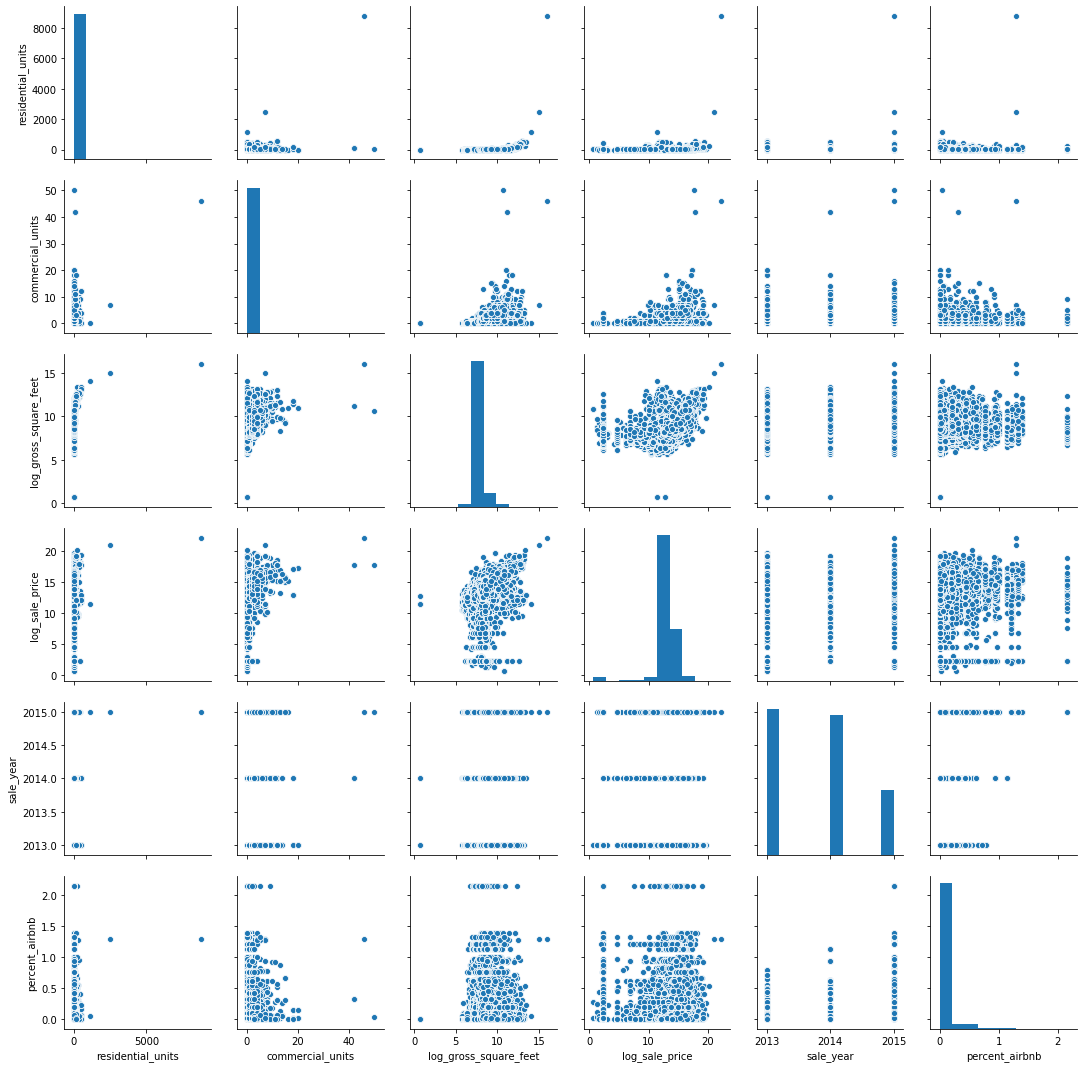

In [13]:
sns.pairplot(data=df)

## Dummify Factor Variables:

In [14]:
#Dummify Factor Variables:
neighborhood = pd.get_dummies(df.neighborhood, drop_first=True)
df = df.drop('neighborhood', axis=1)
df = pd.concat([df, neighborhood], axis=1)

building_class_category = pd.get_dummies(df.building_class_category, drop_first=True)
df = df.drop('building_class_category', axis=1)
df = pd.concat([df, building_class_category], axis=1)

tax_class = pd.get_dummies(df.tax_class, drop_first=True)
df = df.drop('tax_class', axis=1)
df = pd.concat([df, tax_class], axis=1)

decade_built = pd.get_dummies(df.decade_built, drop_first=True)
df = df.drop('decade_built', axis=1)
df = pd.concat([df, decade_built], axis=1)

sale_year = pd.get_dummies(df.sale_year, drop_first=True)
df = df.drop('sale_year', axis=1)
df = pd.concat([df, sale_year], axis=1)

## Correlation:

In [15]:
df.corr()

#Correlation
#Gross_Square_Feet:. 29.22% Correlation between Gross_Square_Feet and Home Sale Price
#Commerical_Units: 13.55% Correlation between Commerical_Units and Home Sale Price
#Airbnb: 12.35% Correlation between Airbnb Concentration and Home Sale Price
#residential_units: 9.71% Correlation between residential_units and Home Sale Price

,residential_units,commercial_units,log_gross_square_feet,log_sale_price,percent_airbnb,ALPHABET CITY,ANNADALE,ARDEN HEIGHTS,ARROCHAR,ARROCHAR-SHORE ACRES,...,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s,2014,2015
residential_units,1.000000,0.299145,0.342157,0.097115,0.052816,0.010776,-0.004823,-0.006927,-0.002092,-0.001572,...,-0.005866,-0.005823,0.005373,0.001076,-0.004540,-0.004511,-0.004769,0.005786,-0.021697,0.009125
commercial_units,0.299145,1.000000,0.357719,0.135450,0.095741,0.035471,-0.009139,-0.013626,-0.003632,-0.003473,...,-0.039511,-0.044884,-0.030369,-0.021245,-0.020130,-0.020397,-0.025899,-0.007352,-0.036717,0.013758
log_gross_square_feet,0.342157,0.357719,1.000000,0.292267,0.213784,0.059119,-0.001333,-0.038678,-0.008936,-0.004276,...,-0.132104,-0.125488,-0.027447,-0.002606,-0.024141,-0.015298,0.068627,0.063595,-0.055111,-0.010987
log_sale_price,0.097115,0.135450,0.292267,1.000000,0.123489,0.040138,0.001700,-0.020199,-0.003305,-0.002080,...,-0.027758,-0.020301,-0.020298,-0.008659,-0.015104,-0.024346,-0.017230,0.035043,-0.023208,0.042792
percent_airbnb,0.052816,0.095741,0.213784,0.123489,1.000000,0.078382,-0.018745,-0.024420,-0.005693,-0.004151,...,-0.084286,-0.091830,-0.073528,-0.048344,-0.036406,-0.019554,-0.017161,-0.012622,0.028970,0.214449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990s,-0.004511,-0.020397,-0.015298,-0.024346,-0.019554,0.001073,0.029404,0.129682,0.028909,0.024366,...,-0.046287,-0.048189,-0.039767,-0.026015,-0.023283,1.000000,-0.036732,-0.025724,0.031717,-0.036158
2000s,-0.004769,-0.025899,0.068627,-0.017230,-0.017161,-0.007589,0.024779,0.020861,0.016973,-0.004300,...,-0.068758,-0.071583,-0.059072,-0.038644,-0.034586,-0.036732,1.000000,-0.038212,0.016378,-0.019236
2010s,0.005786,-0.007352,0.063595,0.035043,-0.012622,0.006593,0.062617,0.052746,-0.000065,0.028497,...,-0.048152,-0.050130,-0.041369,-0.027063,-0.024221,-0.025724,-0.038212,1.000000,0.016318,-0.022788
2014,-0.021697,-0.036717,-0.055111,-0.023208,0.028970,-0.026499,0.012801,0.012855,0.005673,0.005487,...,0.003946,0.001843,0.014852,0.013222,0.018734,0.031717,0.016378,0.016318,1.000000,-0.388031


# Data Modeling

## Partitioning Into Training Test Splits

In [16]:
from sklearn.model_selection import train_test_split

#Test Train Split
x_train, x_test, y_train, y_test = train_test_split(df.drop('log_sale_price', axis = 1), df.log_sale_price, test_size = .2, random_state = 0)

## Testing Linear and Random Forest Regression Models

### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

linear_regression_model = LinearRegression()  
linear_regression_model.fit(x_train, y_train)

y_pred = linear_regression_model.predict(x_test)

#Within 5% is considered near True Value
percent_range = .05
near_true_value = np.where( 
    (y_pred <= y_test*(1 + percent_range)) & (y_pred >= y_test*(1-percent_range)), 1, 0)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Near_True_Value': near_true_value})
results

,Actual,Predicted,Near_True_Value
278768,12.779873,12.286058,1
122933,13.345507,12.826184,1
214104,12.765688,13.242066,1
268824,13.132314,12.822776,1
295599,13.253392,12.406082,0
...,...,...,...
267032,13.066851,12.901174,1
294340,13.652992,13.353003,1
210343,13.814510,13.445635,1
205653,2.302585,13.121138,0


In [18]:
#Analysis of Linear Regression

#74% of Predictions are within 5% of True Value
print('Percent near True Value: ', round( (results.Near_True_Value == 1).sum()/len(results),4))

#R^2
print('Linear Regression R Squared:', round(linear_regression_model.score(x_test, y_test), 4))

#RMSE
linear_regression_rmse = mean_squared_error(y_pred, y_test)
linear_regression_rmse = np.sqrt(linear_regression_rmse)
print('Linear Regression RMSE:', round(linear_regression_rmse,4) )

Percent near True Value:  0.7406
Linear Regression R Squared: 0.1548
Linear Regression RMSE: 1.7467


### Random Forest Regression

In [19]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
random_forest_regression = RandomForestRegressor(random_state = 0)
random_forest_regression.fit(x_train, y_train)

y_pred = random_forest_regression.predict(x_test)

#Within 5% is considered near True Value
percent_range = .05
near_true_value = np.where( 
    (y_pred <= y_test*(1 + percent_range)) & (y_pred >= y_test*(1-percent_range)), 1, 0)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Near_True_Value': near_true_value})
results


,Actual,Predicted,Near_True_Value
278768,12.779873,11.395397,0
122933,13.345507,13.074897,1
214104,12.765688,13.220369,1
268824,13.132314,13.198190,1
295599,13.253392,13.362492,1
...,...,...,...
267032,13.066851,12.976834,1
294340,13.652992,13.525527,1
210343,13.814510,13.803609,1
205653,2.302585,6.825238,0


In [20]:
#81% of Predictions are within 5% of True Value
print('Percent near True Value: ', round( (results.Near_True_Value == 1).sum()/len(results),4))

#R^2
print('Linear Regression R Squared:', round(random_forest_regression.score(x_test, y_test), 4))

#RMSE
random_forest_rmse = mean_squared_error(y_pred, y_test)
random_forest_rmse = np.sqrt(random_forest_rmse)
print('Random Forest RMSE:', round(random_forest_rmse,4) )

Percent near True Value:  0.8156
Linear Regression R Squared: 0.4351
Random Forest RMSE: 1.428


### Observing Coefficients (From Linear Regression)

In [21]:
betas = np.exp(linear_regression_model.coef_)
pd.DataFrame(betas, x_train.columns, columns=['coef'])

,coef
residential_units,1.000440
commercial_units,1.019227
log_gross_square_feet,1.729044
percent_airbnb,1.206806
ALPHABET CITY,2.168046
...,...
1990s,2.372250
2000s,2.653691
2010s,4.048318
2014,1.149036


In [22]:
#Standard Deviation for Percent Airbnb
df.percent_airbnb.std()

0.19539161420946516

In [23]:
#Mean Value for percent_airbnb
np.mean(df.percent_airbnb)

0.06607268836410246

# Conclusion
- Although the Coefficients for percent_airbnb is large *1.20 (120%)*, its important to note that the average percentage is only *0.066*, so a increase in *1 percentage point* is huge (nearly *15x*)

- To better represent the mean airbnb_percentage *(.04)*, we will use standard deviation to display the findings. Viewing in terms of Standard Deviation for Percent Airbnb moving *1 standard deviation* for percent_airbnb *(~0.20)* results in about 0.2358 *(23.58%)* increase in sale price.